In [180]:
#Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [182]:
#Read dataset
df=pd.read_csv("Car_Price.csv")
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,130000


In [184]:
df.rename(columns={'name': 'car_name'}, inplace=True)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            8128 non-null   object 
 1   year                8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   object 
 4   seller_type         8128 non-null   object 
 5   transmission        8128 non-null   object 
 6   owner               8128 non-null   object 
 7   mileage(km/ltr/kg)  7907 non-null   float64
 8   engine              7907 non-null   float64
 9   max_power           7913 non-null   object 
 10  seats               7907 non-null   float64
 11  selling_price       8128 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [188]:
# check Missing value
df.isnull().sum()

car_name                0
year                    0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
selling_price           0
dtype: int64

In [190]:
#Data cleaning:
# Fill missing values ​​in columns 'mileage(km/ltr/kg)', 'engine' and 'seats' with median
df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].median(), inplace=True)
df['engine'].fillna(df['engine'].median(), inplace=True)
df['seats'].fillna(df['seats'].median(), inplace=True)

In [192]:
#Clean up column 'max_power' and convert it to numeric data type
df['max_power'] = df['max_power'].str.extract(r'(\d+\.?\d*)')  #Extract numeric values ​​only  
df['max_power'] = df['max_power'].astype(float) #Convert column to float type
df['max_power'].fillna(df['max_power'].median(), inplace=True)  #Fill missing values ​​in column 'max_power' with median

In [194]:
#Ensure that there are no missing values.
df.isnull().sum()

car_name              0
year                  0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
selling_price         0
dtype: int64

In [196]:
# Check Duplication
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            6926 non-null   object 
 1   year                6926 non-null   int64  
 2   km_driven           6926 non-null   int64  
 3   fuel                6926 non-null   object 
 4   seller_type         6926 non-null   object 
 5   transmission        6926 non-null   object 
 6   owner               6926 non-null   object 
 7   mileage(km/ltr/kg)  6926 non-null   float64
 8   engine              6926 non-null   float64
 9   max_power           6926 non-null   float64
 10  seats               6926 non-null   float64
 11  selling_price       6926 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 703.4+ KB


In [198]:
#Display descriptive statistics for 
df.describe()

,year,km_driven,mileage(km/ltr/kg),engine,max_power,seats,selling_price
count,6926.000000,6.926000e+03,6926.000000,6926.000000,6926.000000,6926.000000,6.926000e+03
mean,2013.420300,7.399568e+04,19.460345,1425.398787,87.556583,5.421600,5.172707e+05
std,4.078286,5.835810e+04,3.987976,487.026967,31.310612,0.972171,5.197670e+05
min,1983.000000,1.000000e+00,0.000000,624.000000,0.000000,2.000000,2.999900e+04
25%,2011.000000,4.000000e+04,16.950000,1197.000000,68.000000,5.000000,2.500000e+05
50%,2014.000000,7.000000e+04,19.300000,1248.000000,81.860000,5.000000,4.000000e+05
75%,2017.000000,1.000000e+05,22.320000,1498.000000,99.000000,5.000000,6.335000e+05
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,1.000000e+07


In [200]:
# Check Duplication
df.duplicated().sum()

0

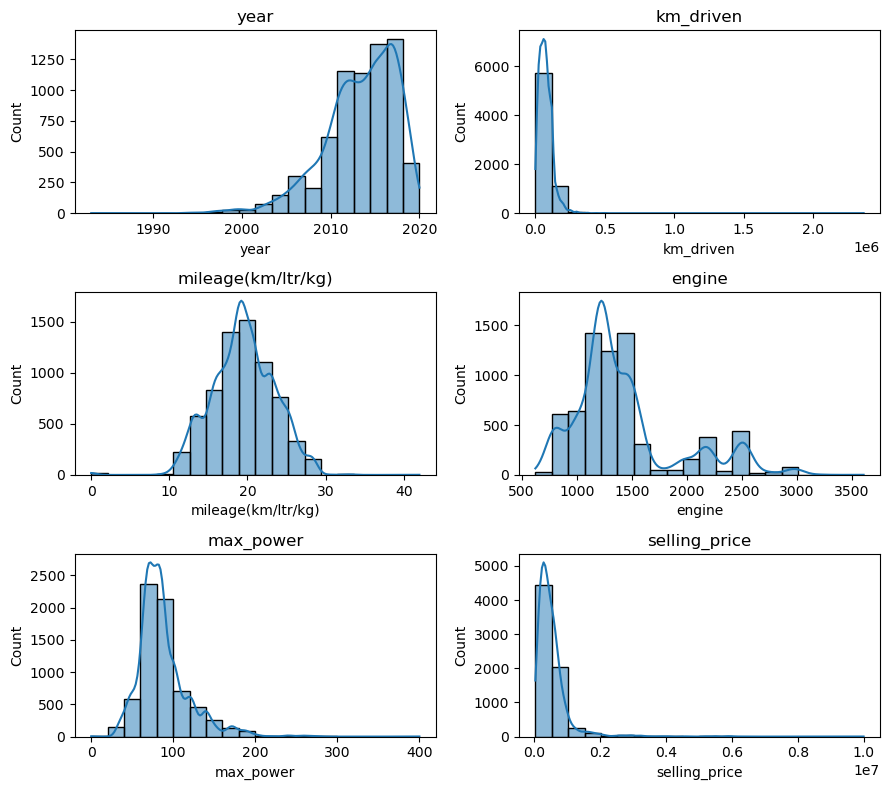

In [202]:
# Distribution of Numerical Features
numerical_features = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power',
                      'selling_price']
                      

plt.figure(figsize=(9,8))
for feature in numerical_features:
    plt.subplot(3, 2, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [203]:
categorical_columns = ['fuel', 'seller_type','transmission', 'owner', 'seats']
for col in categorical_columns:
    print(f"Category in {col} is : {df[col].unique()}")

Category in fuel is : ['Diesel' 'Petrol' 'LPG' 'CNG']
Category in seller_type is : ['Individual' 'Dealer' 'Trustmark Dealer']
Category in transmission is : ['Manual' 'Automatic']
Category in owner is : ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
Category in seats is : [ 5.  4.  7.  8.  6.  9. 10. 14.  2.]


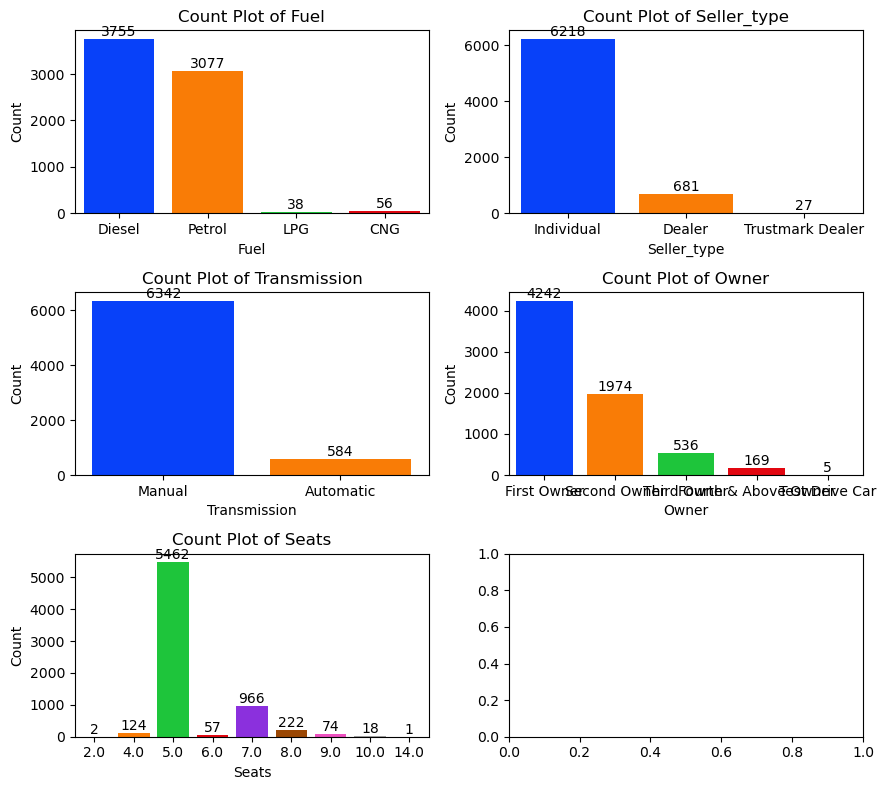

In [206]:
categorical_columns = ['fuel', 'seller_type','transmission', 'owner', 'seats']


# Create subplots

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], hue=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95, legend=False)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')


# Adjust layout and show plots
plt.tight_layout()
plt.show()

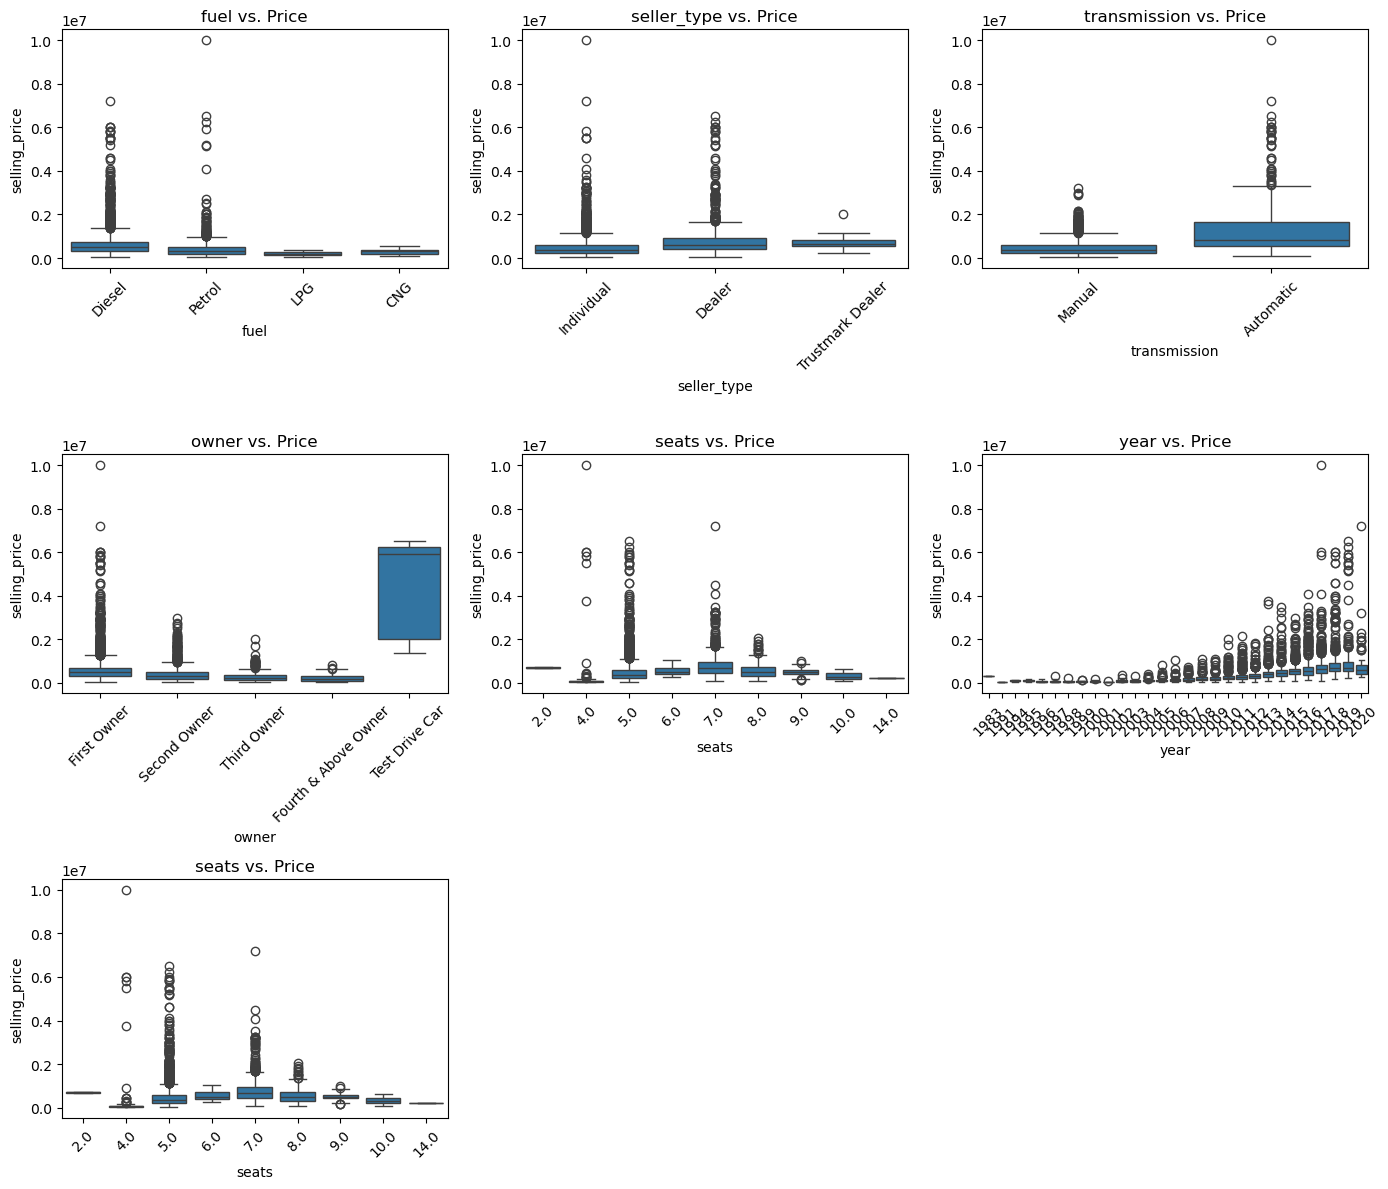

In [207]:
# Categorical Feature vs. Price
categorical_columns = ['fuel','seller_type','transmission', 'owner', 'seats','year','seats']
plt.figure(figsize=(14,12))
for index, feature in enumerate(categorical_columns):
        plt.subplot(3, 3, index + 1)
        sns.boxplot(data=df, x=feature, y='selling_price')
        plt.xticks(rotation=45)
        plt.title(f'{feature} vs. Price')
    
plt.tight_layout()
plt.show()

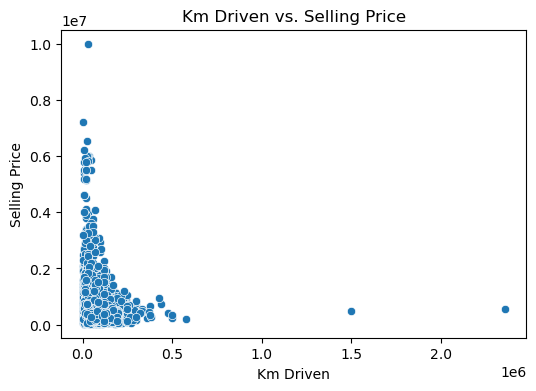

In [209]:
#Relationship between kilometers traveled and price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Km Driven vs. Selling Price')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.show()

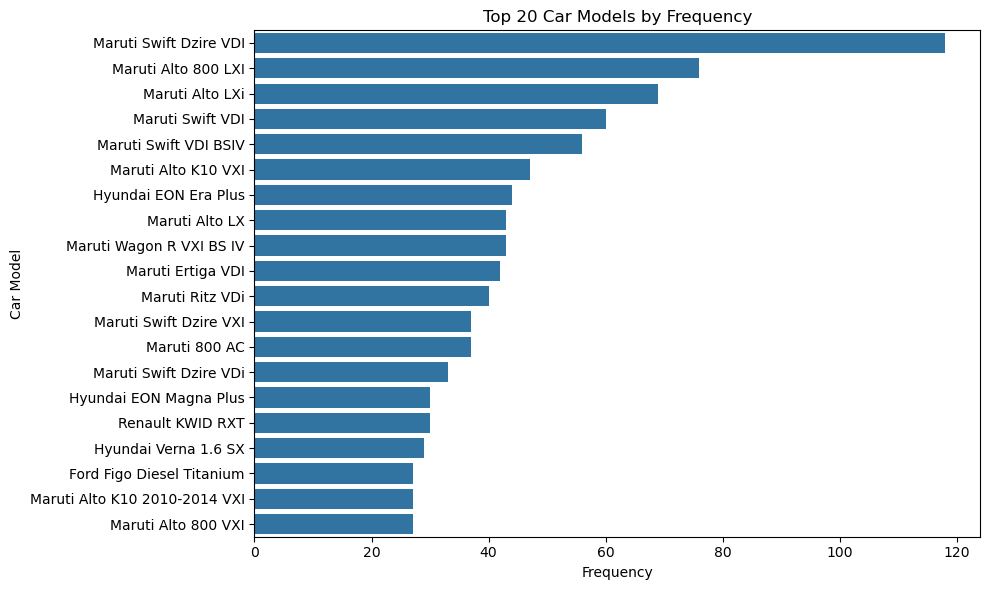

In [210]:

n = 20  # Number of top car models to plot
top_car_models = df['car_name'].value_counts().head(n)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

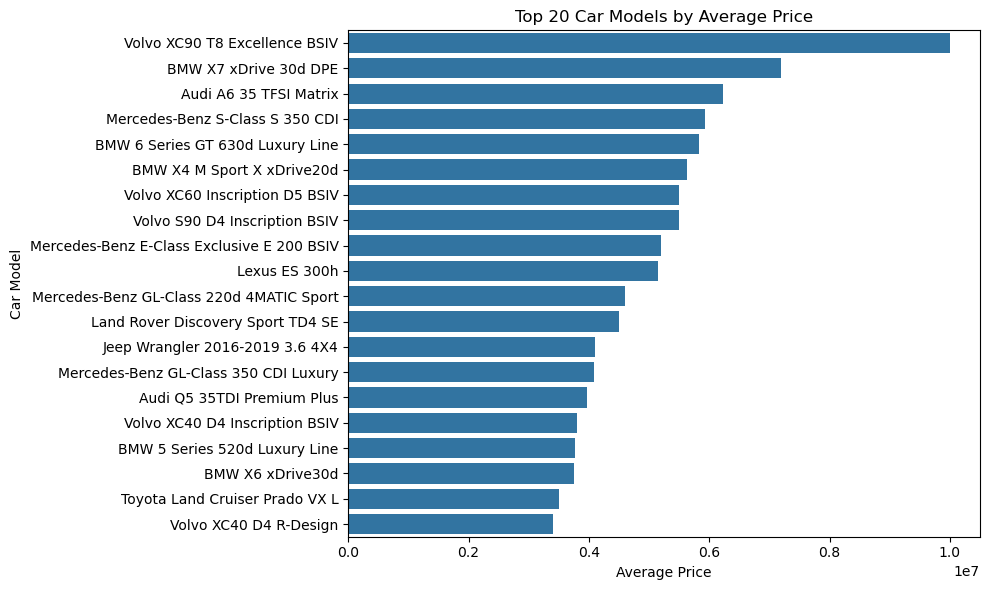

In [214]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('car_name')['selling_price'].mean().sort_values(ascending=False)
# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

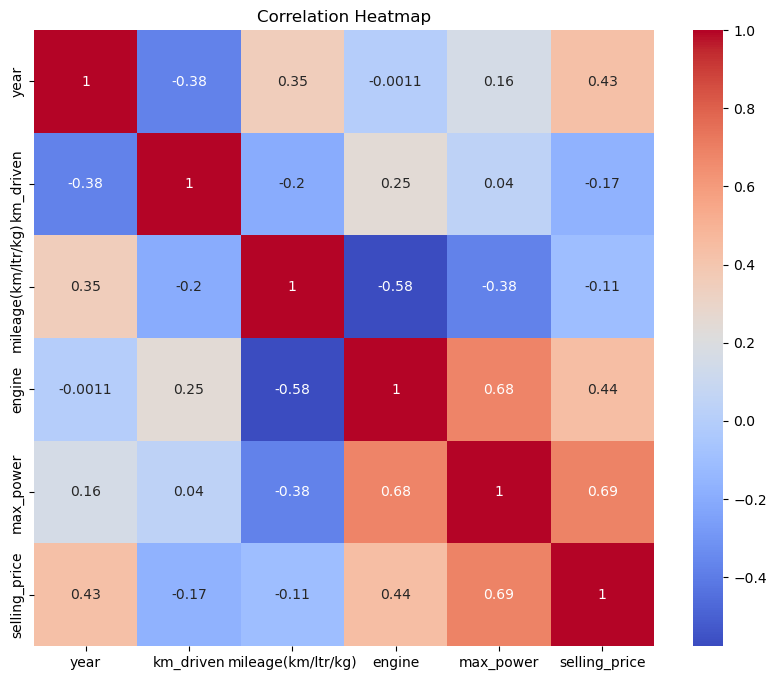

In [216]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [218]:
#Data Pre-Processing
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

#Create a new feature: Car Age
df['car_age'] = 2024 - df['year']

#Remove 'year' column after using it to create 'car_age'
df.drop('year', axis=1, inplace=True)

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# List of features that need to be normalized
numerical_features = ['km_driven', 'engine', 'mileage(km/ltr/kg)', 'max_power', 'car_age']

# Applying the normalization process
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df.head())

                       car_name  km_driven  mileage(km/ltr/kg)    engine  \
0        Maruti Swift Dzire VDI   0.061640            0.557143  0.209396   
1  Skoda Rapid 1.5 TDI Ambition   0.050837            0.503333  0.293289   
2      Honda City 2017-2020 EXi   0.059310            0.421429  0.292953   
3     Hyundai i20 Sportz Diesel   0.053803            0.547619  0.259060   
4        Maruti Swift VXI BSIII   0.050837            0.383333  0.226174   

   max_power  seats  selling_price  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0     0.1850    5.0         450000         True     False        False   
1     0.2588    5.0         370000         True     False        False   
2     0.1950    5.0         158000        False     False         True   
3     0.2250    5.0         225000         True     False        False   
4     0.2205    5.0         130000        False     False         True   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  \
0                 

In [220]:
#Train the Model
# Splitting the dataset
X = df.drop(columns=['selling_price', 'car_name'])
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

Text(0, 0.5, 'Predicted Selling Prices')

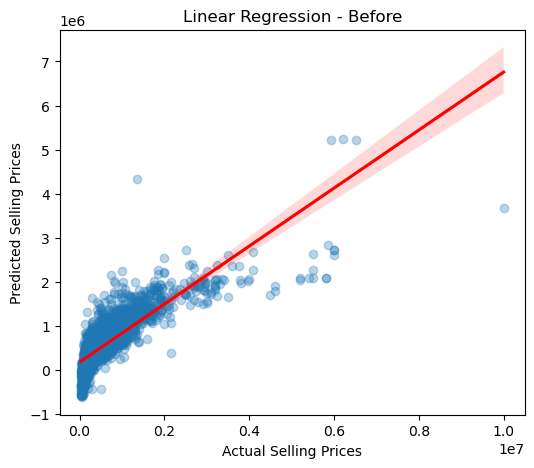

In [222]:
# Create a new figure with a specified size of 14x7 inches
plt.figure(figsize=(6,5))

# Generate a regression plot with actual selling prices on the x-axis and predicted selling prices on the y-axis
# The regression line is colored red, and the scatter points are semi-transparent (alpha=0.3)
sns.regplot(x=y_train, y=model.predict(X_train), line_kws={"color": "red"}, scatter_kws={"alpha":0.3})

# Set the title of the plot
plt.title('Linear Regression - Before')

# Label the x-axis as 'Actual Selling Prices'
plt.xlabel('Actual Selling Prices')

# Label the y-axis as 'Predicted Selling Prices'
plt.ylabel('Predicted Selling Prices')

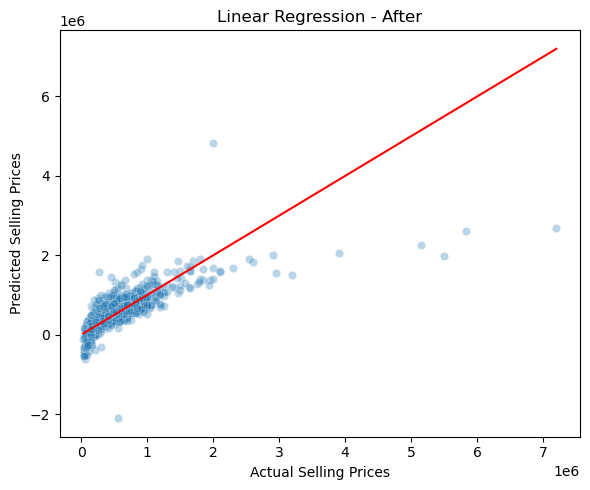

In [224]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=model.predict(X_test), alpha=0.3)  # Scatter plot of actual vs predicted selling prices with some transparency
sns.lineplot(x=y_test, y=y_test, color='red')  # Line representing the ideal regression (perfect prediction line)
plt.title('Linear Regression - After')  # Set the title for the plot
plt.xlabel('Actual Selling Prices')  # Label for the x-axis
plt.ylabel('Predicted Selling Prices')  # Label for the y-axis

plt.tight_layout()  # Adjust the layout to prevent overlap of subplots
plt.show()  # Display the plot